<a href="https://colab.research.google.com/github/aimlgoat/Generative-AI/blob/main/UsedCarsPricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Context**

The production rates of cars have been rising progressively during the past decade, with almost 92 million cars
being produced in the year 2019. This big rise has allowed the used car market to now come
into the picture as a growing industry. The manufacture fixes the costs of recent cars within the industry together with some additional costs that are
incurred by the govt. majorly within the various types of taxes. So, customers that buy a replacement car remain
assured of the money that they invest to be righteous. But because of such increase in prices of the new
cars and therefore the inability of the many customers to shop for a replacement car thanks to the dearth of
sufficient funds, they like used cars which has resulted into a world increase within the sales of used cars.
Therefore, there's a necessity to possess a second hand car price prediction model to accurately determine the
worthiness of the car considering a range of features.

## **Problem statement**

A company named **Ucars** predicts the price of used cars. Lots of customers approach them to get an estimate of the price of the used car that they want to buy. You working aa a Data Scientist in the Ucars team developing the model that can predict the price of these used cars.

#### **Data Dictionary**

We are using the cars dataset from Kaggle, and the description of the features is given below:

**Model**: The brand and model of the car

**Year**: The year or edition of the model

**Transmission**: The type of transmission used by the car (Automatic / Manual)

**Mileage**: The standard mileage offered by the car company in kmpl or km/kg

**Price**: The price of the car

**Color**: Color of the car

In [ ]:
!pip install tensorflow

#### Import required libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
import sklearn
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

#### Reading the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
f='/content/drive/MyDrive/aiml/dl/new_preprocessed_data.csv'

In [ ]:
cars_data = pd.read_csv(f)
cars_data.head()

,loan_status,Principal,age,education_Bechalor,education_High School or Below,education_Master or Above,education_college,Gender_female,Gender_male,terms_7,terms_15,terms_30
0,0,1000,45,0,1,0,0,0,1,0,0,1
1,0,1000,50,1,0,0,0,1,0,0,0,1
2,0,1000,33,1,0,0,0,1,0,0,0,1
3,0,1000,27,0,0,0,1,0,1,0,1,0
4,0,1000,28,0,0,0,1,1,0,0,0,1


##### Overview of Dataset

Let's check the null values in each column of the dataset

In [ ]:
cars_data.isna().sum()

loan_status                       0
Principal                         0
age                               0
education_Bechalor                0
education_High School or Below    0
education_Master or Above         0
education_college                 0
Gender_female                     0
Gender_male                       0
terms_7                           0
terms_15                          0
terms_30                          0
dtype: int64

* As you can see, there are no null values in any of the column

Exploring the column names

In [ ]:
cars_data.columns

Index(['loan_status', 'Principal', 'age', 'education_Bechalor',
       'education_High School or Below', 'education_Master or Above',
       'education_college', 'Gender_female', 'Gender_male', 'terms_7',
       'terms_15', 'terms_30'],
      dtype='object')

### Univariate Analysis

It’s always good to get some insight about the target variable. The target or dependent variable is price in our case.


In [ ]:
df=cars_data
print(df.loan_status.mean())
print(df.loan_status.median())

0.6
0.0


Mean is slightly  lesser than median which indicates there are few outliers or extreme values. Let’s also check maximum and minimum values:

In [ ]:
print(df.loan_status.max())
print(df.loan_status.min())

2
0


In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
#histogram_boxplot(df, "loan_status")

It can be seen from the graph that the data is looking approx symmetric and the peak is around 10000-15000. Another way of checking the distribution and outliers is boxplot:

<Axes: xlabel='loan_status', ylabel='count'>

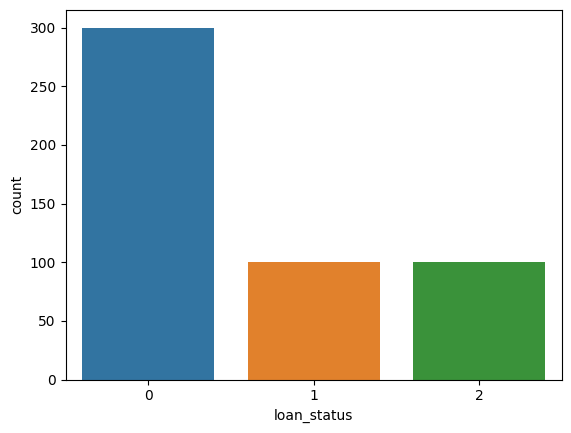

In [ ]:
sns.countplot(x=df.loan_status)

In [ ]:
df[df.loan_status==1]

,loan_status,Principal,age,education_Bechalor,education_High School or Below,education_Master or Above,education_college,Gender_female,Gender_male,terms_7,terms_15,terms_30
400,1,1000,26,0,0,0,1,0,1,0,0,1
401,1,1000,28,0,0,0,1,0,1,0,1,0
402,1,1000,39,0,0,0,1,0,1,0,0,1
403,1,1000,29,1,0,0,0,0,1,0,1,0
404,1,800,33,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,1000,28,0,1,0,0,0,1,0,0,1
496,1,1000,26,0,1,0,0,0,1,0,1,0
497,1,800,30,0,0,0,1,0,1,0,1,0
498,1,1000,38,0,0,0,1,1,0,0,0,1


#### Removing Outliers

Dependent variable "price" contains  4 data points which are outliers. The loss function which will be used for regression is MSE and it tries to model the mean of the dependent variable. Having outliers in the response variable might give biased model. Let's remove these data points .





In [ ]:
#Removing the outlier datapoints because these point might disrupt the modelling
#df.drop(df[df.price>20000].index,inplace=True,axis=0)

### Bivariate analysis

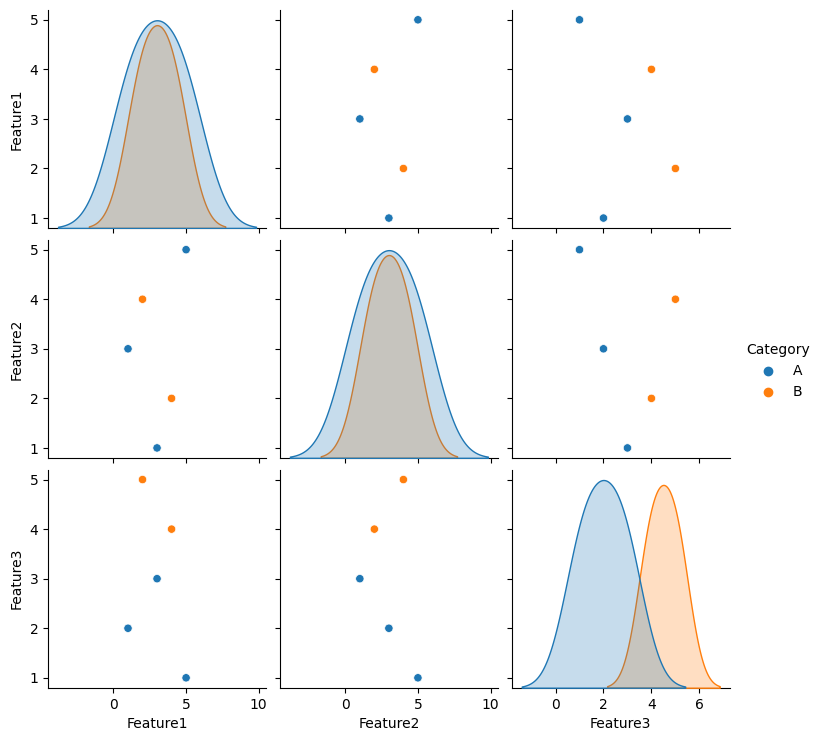

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data (in a DataFrame)
import pandas as pd
data = pd.DataFrame({'Feature1': [1, 2, 3, 4, 5],
                     'Feature2': [3, 4, 1, 2, 5],
                     'Feature3': [2, 5, 3, 4, 1],
                     'Category': ['A', 'B', 'A', 'B', 'A']})

# Create a pairplot with hue
sns.pairplot(data, hue='Category')



Manual and Automatic Cars

In [ ]:
# sns.pairplot(df,hue = 'loan_status',diag_kind = "kde",kind = "scatter",palette = "dark",height=3.5)
# plt.legend(title='loan_status')
# plt.show()

We can see that automatic cars have higher price range than manual type cars though the distribution of automatic cars were skewed to the right. We can also see the increament in price of automatic cars between 2010 and 2015.

Let’s try to have a quick look at the joint distribution of a few pairs of columns from the training set.

In [ ]:
#sns.pairplot(df[['year', 'price', 'mileage']], diag_kind="kde")

* year and price have some amount of linear relationship which means cars which are manufactured recently are costly

* price and mileage are having linear relationship with negative slope which means costly cars have less mileage.

Lets visualize  the correlation between the features

<Axes: >

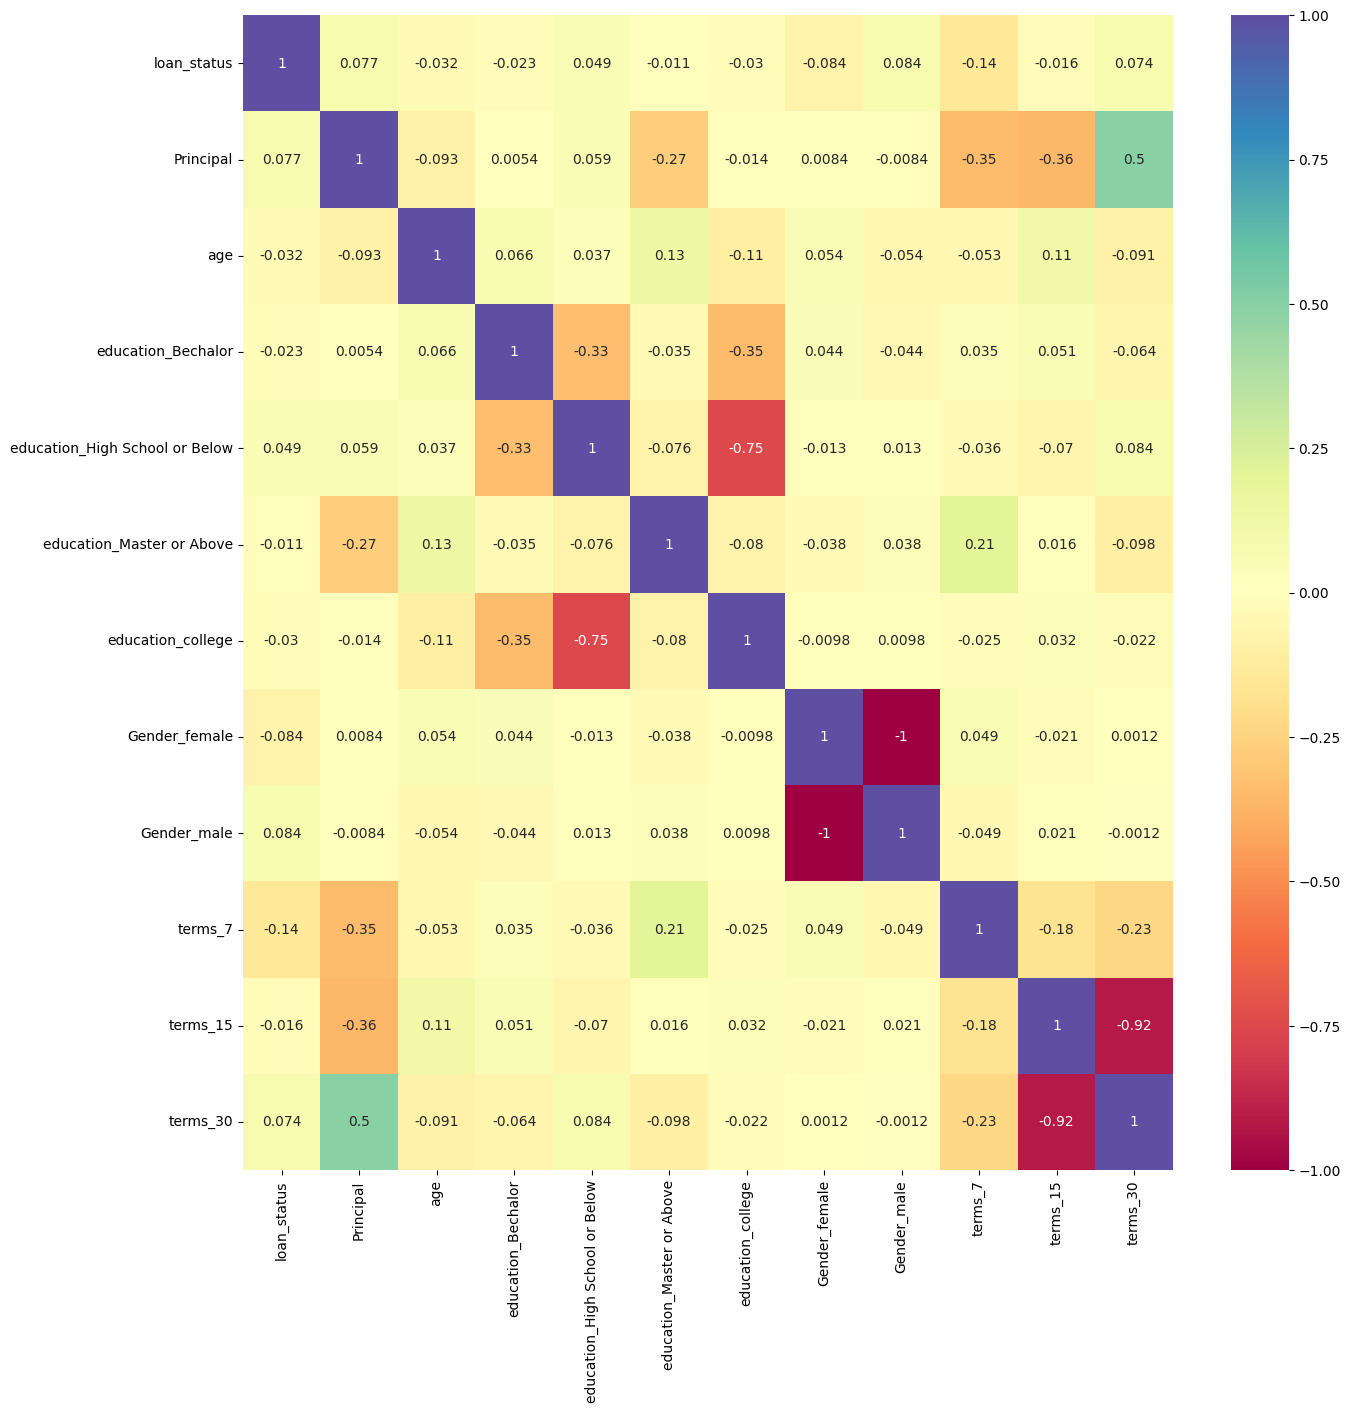

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),cmap="Spectral",ax=ax,annot=True)

* year and price are having high positive correlation.

* mileage and price are having high negative corrlation.

* year and mileage are having high negative correlation.


<Axes: xlabel='loan_status', ylabel='Principal'>

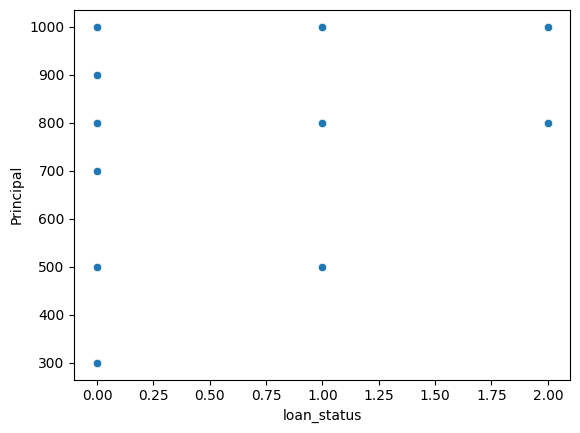

In [ ]:
sns.scatterplot(x=df.loan_status,y=df.Principal,)

<Axes: xlabel='loan_status', ylabel='Principal'>

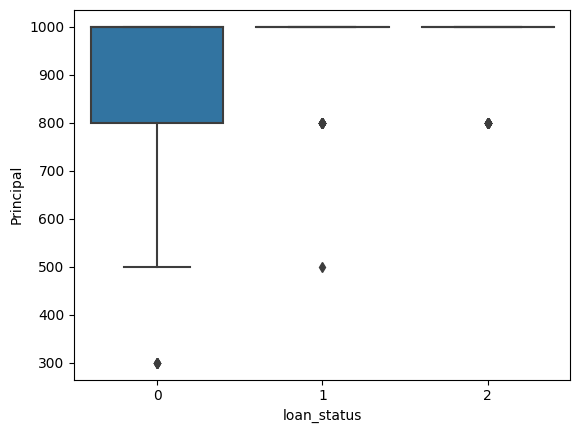

In [ ]:
sns.boxplot(data=df,x='loan_status',y='Principal')

### Separate the features from labels



In [ ]:
#getting the features and labels and finally splitting the test and train data.
X = df.drop('loan_status',axis=1)
Y = df['loan_status']

#### Splitting the dataset

In [ ]:
#Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1,shuffle=True)

Notice that the last three columns (color, Transmission, Model) are not numerical values, but categorical entries?

To utilise the columns, we’ll need to find a way to make them numerical, and a perfect technique is One-hot Encoding

In [ ]:
#X_train = pd.get_dummies(X_train,columns= ['model','color','transmission','year'],drop_first =True)
#X_test = pd.get_dummies(X_test,columns= ['model','color','transmission','year'],drop_first =True)

In [ ]:
# Checking the shape of train and test data
print(X_train.shape)
print(X_test.shape)

(400, 11)
(100, 11)


In [ ]:
X_train.columns

Index(['Principal', 'age', 'education_Bechalor',
       'education_High School or Below', 'education_Master or Above',
       'education_college', 'Gender_female', 'Gender_male', 'terms_7',
       'terms_15', 'terms_30'],
      dtype='object')

In [ ]:
from keras.utils import to_categorical
y_train_tc=to_categorical(y_train,num_classes=3)
y_test_tc=to_categorical(y_test,num_classes=3)
y_train_tc

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

#### Normalizing the train and test data separately

In [ ]:
sc=StandardScaler()
ndf=X_train[["Principal","age"]]
temp = sc.fit(ndf)
X_train[["Principal","age"]] = temp.transform(ndf)
X_test[["Principal","age"]] = temp.transform(X_test[["Principal","age"]])

We need to scale the target column since it is a numerical column.

In [ ]:
y_train
type(y_train)

pandas.core.series.Series

### Model building

#### Lets build a build using Keras

We’ll use a Sequential model with  multiple connected hidden layers, and an output layer that returns a single, continuous value.

**What Are Keras and tf.keras?**


Keras is an open-source deep learning library written in Python.

The project was started in 2015 by Francois Chollet. It quickly became a popular framework for developers, becoming one of, if not the most, popular deep learning libraries.

During the period of 2015-2019, developing deep learning models using mathematical libraries like TensorFlow, Theano, and PyTorch was cumbersome, requiring tens or even hundreds of lines of code to achieve the simplest tasks. The focus of these libraries was on research, flexibility, and speed, not ease of use.

Keras was popular because the API was clean and simple, allowing standard deep learning models to be defined, fit, and evaluated in just a few lines of code.

A secondary reason Keras took-off was because it allowed you to use any one among the range of popular deep learning mathematical libraries as the backend (e.g. used to perform the computation), such as TensorFlow, Theano, and later, CNTK. This allowed the power of these libraries to be harnessed (e.g. GPUs) with a very clean and simple interface.

In 2019, Google released a new version of their TensorFlow deep learning library (TensorFlow 2) that integrated the Keras API directly and promoted this interface as the default or standard interface for deep learning development on the platform.

This integration is commonly referred to as the tf.keras interface or API (“tf” is short for “TensorFlow“). This is to distinguish it from the so-called standalone Keras open source project.

**Standalone Keras** The standalone open source project that supports TensorFlow, Theano and CNTK backends.

**tf.keras** The Keras API integrated into TensorFlow 2.
The Keras API implementation in Keras is referred to as “tf.keras” because this is the Python idiom used when referencing the API. First, the TensorFlow module is imported and named “tf“; then, Keras API elements are accessed via calls to tf.keras; for example:

# example of tf.keras python
import tensorflow as tf
# use keras API
model = tf.keras.Sequential()


### Building the model using tf.keras:



In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
import random
random.seed(1)
tf.random.set_seed(1)

In [ ]:
def build_model():
  ## Initializing the ANN
  model = Sequential()
  # This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
  input_layer = Dense(32, input_shape=(X_train.shape[1],),activation='relu')
  model.add(input_layer) #
  #Adding the hidden layer
  # Notice that we do not need to specify input dim.
  hidden_layer = Dense(64, activation='relu');
  model.add(hidden_layer)
  model.add(Dense(128, activation='relu'))
  #Adding the output layer
  # Notice that we do not need to specify input dim.
  # Since we are predicting the price (Numerical value), we need to pass only one neuron in the output layer.
  output_layer = Dense(3, activation='softmax')
  model.add(output_layer)

  # Defining the optimizer
  optimizer = tf.keras.optimizers.Adam(0.001)  # Defining the optimizer
  # Compiling the model
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=[ 'categorical_accuracy'])  # Defining the loss function, optimizer and metrices
  return model

Build the model and view the summary

In [ ]:
#Getting the model summary. We are uisng standalone keras to build our model
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 11203 (43.76 KB)
Trainable params: 11203 (43.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Let’s now train the model for 50 epochs, and record the training and validation accuracy in ‘history’.

In [ ]:
#Definign the number of epochs
EPOCHS = 600
#fitting the model
history = model.fit(X_train, y_train_tc,epochs=EPOCHS, validation_split = 0.2, verbose=1)

Epoch 1/600
10/10 [==============================] - 2s 24ms/step - loss: 1.0282 - categorical_accuracy: 0.5375 - val_loss: 0.9594 - val_categorical_accuracy: 0.6125
Epoch 2/600
10/10 [==============================] - 0s 10ms/step - loss: 0.9285 - categorical_accuracy: 0.6250 - val_loss: 0.9613 - val_categorical_accuracy: 0.6125
Epoch 3/600
10/10 [==============================] - 0s 7ms/step - loss: 0.9234 - categorical_accuracy: 0.6250 - val_loss: 0.9518 - val_categorical_accuracy: 0.6125
Epoch 4/600
10/10 [==============================] - 0s 6ms/step - loss: 0.9132 - categorical_accuracy: 0.6250 - val_loss: 0.9404 - val_categorical_accuracy: 0.6125
Epoch 5/600
10/10 [==============================] - 0s 6ms/step - loss: 0.9063 - categorical_accuracy: 0.6250 - val_loss: 0.9359 - val_categorical_accuracy: 0.6125
Epoch 6/600
10/10 [==============================] - 0s 6ms/step - loss: 0.9009 - categorical_accuracy: 0.6250 - val_loss: 0.9341 - val_categorical_accuracy: 0.6125
Epoch 7/

Let's plot the  validation and training loss

In [ ]:
print(history.history.keys)

<built-in method keys of dict object at 0x7ece7a77c700>


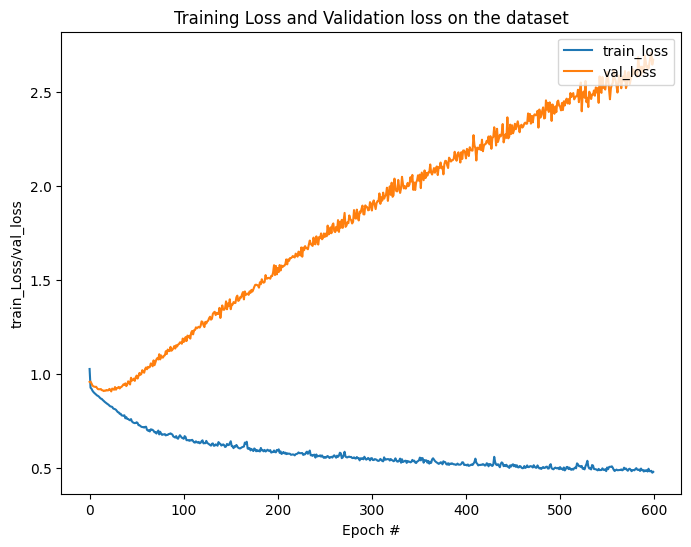

In [ ]:
N = 600
import pylab as plt
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="upper right")
plt.show()

From the above plot, we can say that the train and validation are having a smooth loss

#### Testing the model

In [ ]:
model.evaluate(X_test,y_test)

ValueError: ignored

Let’s predict


In [ ]:
#Lets Print the predicted prices
y_pred=model.predict(X_test)
#y_pred1=target_scaler.inverse_transform(test_predictionsk.reshape(-1, 1))

5/5 [==============================] - 0s 3ms/step


In [ ]:
y_pred


array([[6.14356339e-01, 6.59346333e-05, 3.85577768e-01],
       [6.54776990e-01, 1.85389798e-02, 3.26684028e-01],
       [5.84807575e-01, 2.16711566e-01, 1.98480859e-01],
       [4.16485280e-01, 2.04133570e-01, 3.79381180e-01],
       [2.77852118e-01, 6.86180770e-01, 3.59670334e-02],
       [4.11658019e-01, 1.94959670e-01, 3.93382281e-01],
       [6.50821507e-01, 1.86879098e-01, 1.62299395e-01],
       [5.50742924e-01, 4.19052839e-01, 3.02043129e-02],
       [9.98160303e-01, 1.74936315e-03, 9.03691835e-05],
       [9.98394430e-01, 1.60548266e-03, 1.12984793e-07],
       [5.50742924e-01, 4.19052839e-01, 3.02043129e-02],
       [7.80621290e-01, 1.83008537e-01, 3.63701731e-02],
       [9.29678619e-01, 6.45404158e-04, 6.96759075e-02],
       [3.59613866e-01, 6.20544732e-01, 1.98413953e-02],
       [5.99601924e-01, 4.00192559e-01, 2.05526943e-04],
       [2.21152991e-01, 3.94959390e-01, 3.83887649e-01],
       [8.62493038e-01, 1.35454416e-01, 2.05249176e-03],
       [9.72546101e-01, 1.25353

In [ ]:
np.round(y_pred)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1

Let's Calculate the R2 to evaluate the model

In [ ]:
#sklearn.metrics.precision_score(y_test,y_pred)

ValueError: ignored

R2 is 0.61 and it seems to be fine, But this can be improved.

Now let's try to increase the number of hidden layers and neurons in the hidden layers and see if we can get a good r2 score.

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
import random
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Initializing the model
model_2 = Sequential()
# Adding input layer with 14 variables and 64 neurons with relu as activation function
model_2.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# adding second hidden layer with 32 neurons and relu as activation function
model_2.add(Dense(32, activation='relu'))
# adding first hidden layer with 8 neurons and relu as activation function
model_2.add(Dense(16, activation='relu'))
# adding the output layer with 1 neuron and linear as activation function
model_2.add(Dense(3, activation='softmax'))

In [ ]:
# Summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 3427 (13.39 KB)
Trainable params: 3427 (13.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Defining the optimizer
optimizer = tf.keras.optimizers.Adam(0.001)
# Compiling the model
model_2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
# Fitting the model on train data
history = model_2.fit(X_train, y_train, validation_split = 0.2, epochs=500)

Epoch 1/50
9/9 [==============================] - 2s 28ms/step - loss: 1.0377 - accuracy: 0.5929 - val_loss: 0.9913 - val_accuracy: 0.6000
Epoch 2/50
9/9 [==============================] - 0s 7ms/step - loss: 0.9673 - accuracy: 0.6357 - val_loss: 0.9481 - val_accuracy: 0.6000
Epoch 3/50
9/9 [==============================] - 0s 8ms/step - loss: 0.9230 - accuracy: 0.6357 - val_loss: 0.9328 - val_accuracy: 0.6000
Epoch 4/50
9/9 [==============================] - 0s 7ms/step - loss: 0.9001 - accuracy: 0.6357 - val_loss: 0.9244 - val_accuracy: 0.6000
Epoch 5/50
9/9 [==============================] - 0s 9ms/step - loss: 0.8902 - accuracy: 0.6357 - val_loss: 0.9147 - val_accuracy: 0.6000
Epoch 6/50
9/9 [==============================] - 0s 8ms/step - loss: 0.8838 - accuracy: 0.6357 - val_loss: 0.9109 - val_accuracy: 0.6000
Epoch 7/50
9/9 [==============================] - 0s 9ms/step - loss: 0.8789 - accuracy: 0.6357 - val_loss: 0.9112 - val_accuracy: 0.6000
Epoch 8/50
9/9 [=================

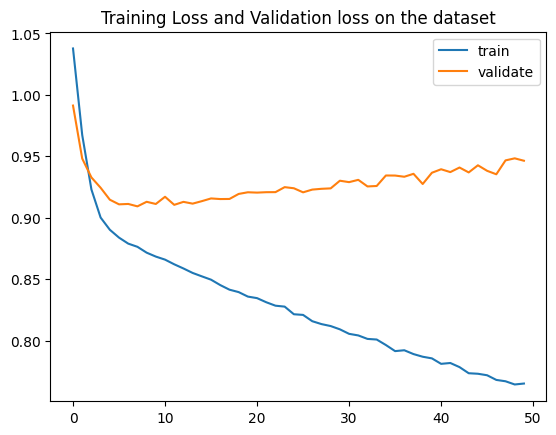

In [ ]:
from matplotlib import pyplot
pyplot.title('Training Loss and Validation loss on the dataset')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

From the above plot, we can observe that there is some noise in the validation data.

Predicting on test data

In [ ]:
model_2.evaluate(X_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 1.1337 - accuracy: 0.5200


[1.1337090730667114, 0.5199999809265137]

In [ ]:
from sklearn.metrics import precision_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset as an example
data = load_iris()
X = data.data
y = data.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a classifier (e.g., logistic regression)
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Calculate precision for each class
precision_per_class = precision_score(y_test, y_pred, average=None)

# Calculate the macro-average precision
macro_precision = precision_score(y_test, y_pred, average='macro')

# Calculate the weighted-average precision
weighted_precision = precision_score(y_test, y_pred, average='weighted')

# Print precision for each class and macro and weighted averages
print("Precision per class:")
for class_label, precision in enumerate(precision_per_class):
    print(f"Class {class_label}: {precision:.4f}")

print(f"Macro-average Precision: {macro_precision:.4f}")
print(f"Weighted-average Precision: {weighted_precision:.4f}")


In [ ]:
history

In [ ]:
#Lets Print the predicted prices
test_predictions_2=model_2.predict(X_test)
y_pred_2=target_scaler.inverse_transform(test_predictions_2.reshape(-1, 1))

In [ ]:
sklearn.metrics.r2_score(target_scaler.inverse_transform(y_test.reshape(-1, 1)),y_pred_2)

0.7318446891254543

We got 0.73 as an r2 score which is good when compared to the previous model score. Hence increasing the hidden layers work, and we can say that the second model is more generalized when compared to the first model.

**Conclusion:**

- Cars which are manufactured recently are costly and have  less mileage.

- Price of car is highly dependent on the mileage and the manufacturing year

- Automatic cars have higher price range than manual type cars.

- There is an increment in price of automatic cars between 2010 and 2015.





We learnt creating a very simple regression models using Neural Networks on used cars data and predicted prices.


## <i>Happy Learning!</i>